Hola **Andrés**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Paso 1. Carga de librerias y exploración inicial de datos.

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [133]:
#Cargamos los datos como DF.
hypo = pd.read_csv('/datasets/hypotheses_us.csv')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')


In [134]:
#Realizamos la exploración inicial de los datos.

hypo.info()
hypo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Hypothesis;Reach;Impact;Confidence;Effort  9 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes


,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...
3,Change the category structure. This will incre...
4,Change the background color on the main page. ...


Como primera observación detectamos que en el archivo csv, no se encuentran los datos separados por coma estándard, por lo que procesaremos el archivo con ; como separador.

In [135]:
hypo = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
hypo.info()
hypo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


Parece que no tenemos datos ausentes, y parecen el tipo correcto de datos.

In [136]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


En este DF nuevamente no parece que tengamos datos ausentes y hacemos nota que la columna de date se encuentra en object.

In [137]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Tampoco parece que presentemos datos ausentes en el Df de visits, y al igual que el anterior observamos la columna de date en tipo object.

# 1.1 Optimización de datos

In [138]:
#Como buena práctica renombramos las columnas a minúsculas en los Df que lo requieren.

hypo_columns = {
    "Hypothesis":"hypothesis",
    "Reach":"reach",
    "Impact":"impact",
    "Confidence":"confidence",
    "Effort":"effort",
}

orders_columns = {
    "transactionId":"transactionid",
    "visitorId":"visitorid",
    "date":"date",
    "revenue":"revenue",
    "group":"group",
}

hypo.rename(columns = hypo_columns, inplace = True)
orders.rename(columns = orders_columns, inplace = True)

print(hypo.columns)
print()
print(orders.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')


In [139]:
#Procedemos a revisar si tenemos Nans o duplicados en algunas de las columnas y filas de nuestros 3 dataframes.

hypo[['hypothesis', 'reach', 'impact', 'confidence', 'effort']].isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64

In [140]:
hypo[['hypothesis', 'reach', 'impact', 'confidence', 'effort']].duplicated().sum()

0

In [141]:
orders[['transactionid', 'visitorid', 'date', 'revenue', 'group']].isna().sum()

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

In [142]:
orders[['transactionid', 'visitorid', 'date', 'revenue', 'group']].duplicated().sum()

0

In [143]:
visits[['date','group','visits']].isna().sum()

date      0
group     0
visits    0
dtype: int64

In [144]:
visits[['date','group','visits']].duplicated().sum()

0

# Priorización de hipótesis con data wrangling.

In [145]:
#Comprobado que no tenemos Nans ni duplicados procedemos a comenzar a trabajar nuestras tablas intermedias para agregar columnas que nos puedan ser útiles para el análisis de hipotesis.
#Como primer paso agregaremos una columna con el cálculo de ICE para cada variable:

hypo['ice'] = hypo['impact'] * hypo['confidence'] / hypo['effort']
ice_ranking = hypo.sort_values('ice', ascending = False)
ice_ranking

,hypothesis,reach,impact,confidence,effort,ice
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


Podemos observar el ranking para hipotésis de acuerdo al cálculo realizado de ice.

In [146]:
#Procedemos a calcular el ranking para hipotésis de acuerdo integrando la variable de reach, por ende el cáculo de RICE.

hypo['rice'] = hypo['reach'] * hypo['impact'] * hypo['confidence'] / hypo['effort']

In [147]:
rice_ranking = hypo.sort_values('rice', ascending=False)
rice_ranking

,hypothesis,reach,impact,confidence,effort,ice,rice
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


Hemos obtenido el ranking de priorización de hipotésis ahora tomando en cuenta la variable de RICE.

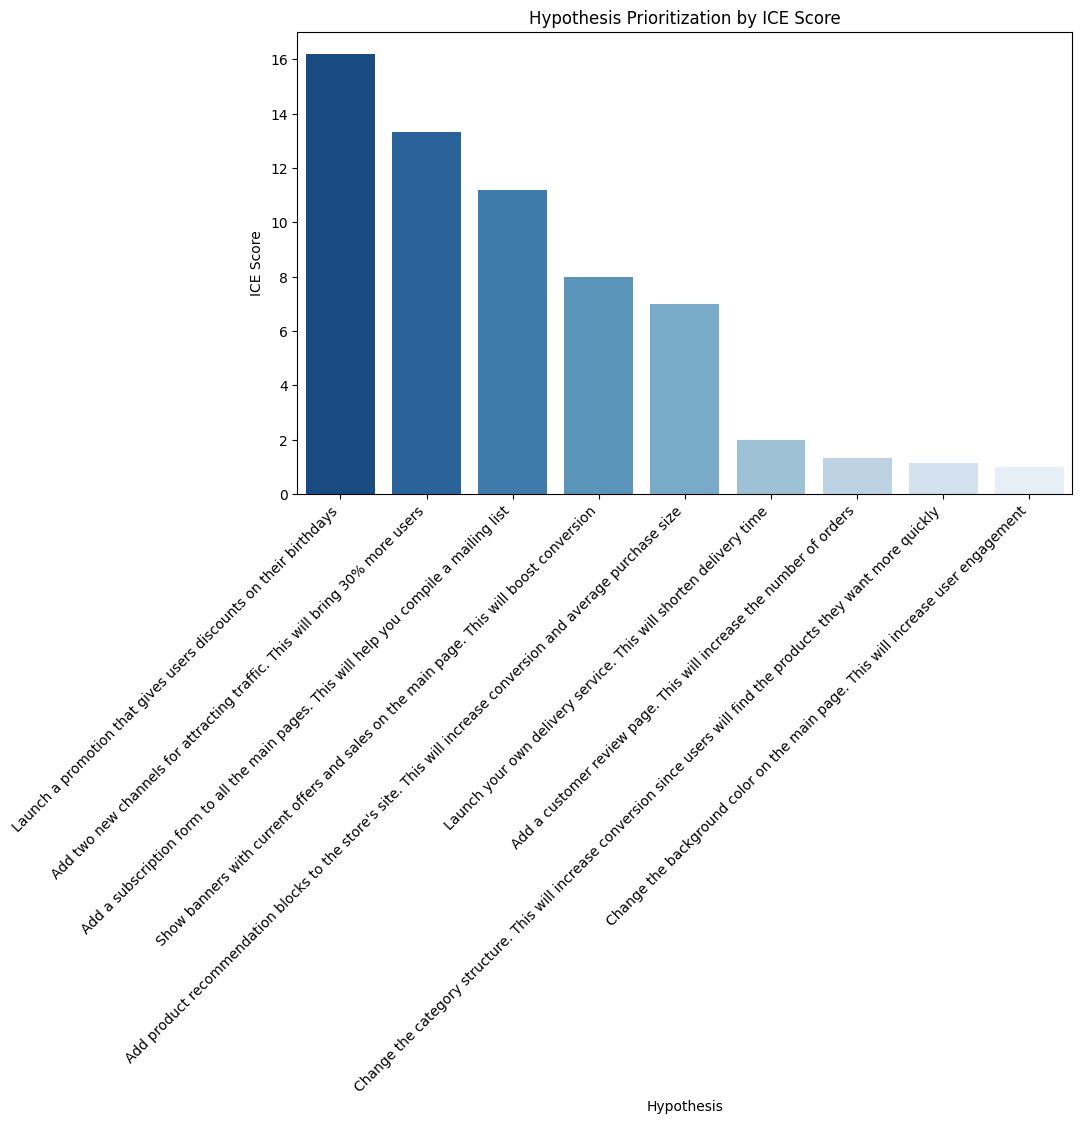

In [148]:
#Procedemos a mostrar visualmente la diferencia en ranking de acuerdo a la priorización de hipotésis de los métodos ICE y RICE.

data = rice_ranking.sort_values(by="ice", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x="hypothesis", y="ice", data=data, palette="Blues_r")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Hypothesis")
plt.ylabel("ICE Score")
plt.title("Hypothesis Prioritization by ICE Score")
plt.show()

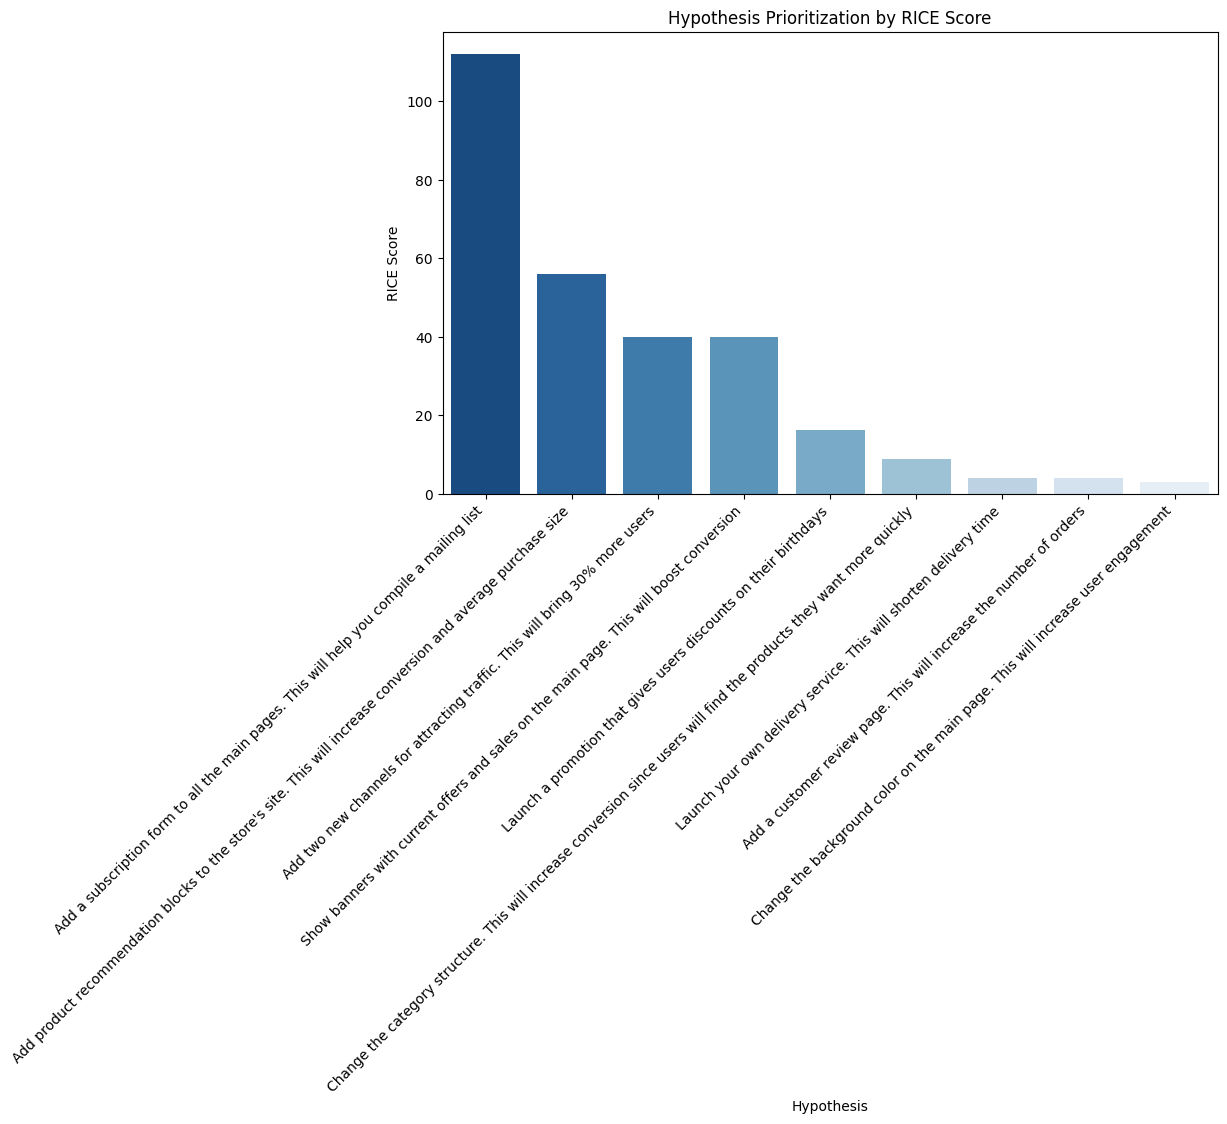

In [149]:
data = rice_ranking.sort_values(by="rice", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x="hypothesis", y="rice", data=data, palette="Blues_r")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Hypothesis")
plt.ylabel("RICE Score")
plt.title("Hypothesis Prioritization by RICE Score")
plt.show()

Como podemos observar en general han sufrido un cambio en posición de ranking la todas las variables salvo la #6 y la #4 que permanecen en la cuarta y última posición respectivamente. Podemos inferir que la variable de reach tiene bastante peso al momento de hace nuestra priorización.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el cálculo para la priorización con los diferentes frameworks! La gráfica es excelente para dejar de manera visual las comparaciones
</div>

# Parte 2 Análisis del test A/B

In [150]:
#Analizaremos la advertencia de la posibilidad de que algunos de los visitantes podrían haber ordenado desde ambos grupos.

grupo_a = orders[orders['group'] == 'A']['visitorid']
grupo_b = orders[orders['group'] == 'B']['visitorid']

# Encontrar los usuarios presentes en ambos grupos
usuarios_comunes = grupo_a[grupo_a.isin(grupo_b)]

# Mostrar los usuarios comunes
print("Usuarios presentes en ambos grupos:")
print(usuarios_comunes.head(10))
usuarios_comunes.nunique()

Usuarios presentes en ambos grupos:
2      4069496402
26      199603092
29     3803269165
33     2378935119
41      237748145
114    4256040402
117    2038680547
118    2378935119
129    1738359350
133    2458001652
Name: visitorid, dtype: int64


58

Hemos identificado que existen 58 usuarios que ordenaron desde ambas páginas por lo que se podria considerar que contaminan nuestros resultados. Al ser una porción pequeña y por practicidad optaremos por eliminar las ordenes de esos usuarios los datos, antes de continuar con el resto de nuestros calculos.

In [151]:
#Procedemos a filtrar de la tabla de orders los usuarios que aparecen con compras en ambos grupos:

# Eliminar los usuarios comunes de la tabla original
orders = orders[~orders['visitorid'].isin(usuarios_comunes)]

In [152]:
#Convertimos el tipo de datos para date en la tabla orders y en visits.

orders['date'] = pd.to_datetime(orders['date'])
visits['date'] =pd.to_datetime(visits['date'])
orders.info()
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1016 non-null   int64         
 1   visitorid      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Ya con la tabla filtrada procedemos a estudiar los resultados de nuestra prueba A/B cuyos registros se encuentran en las tablas orders y visits.
Haremos una gráfica del ingreso acumulado por grupo, un gráfica del tamaño promedio acumulado por grupo y una más de la diferencia relativa en el tamaño de pedido promedio acumulado comparativo.

In [153]:
#Comenzamos a armar una tabla intermedia que nos servirá para realizar nuestros cálculos.
fechas_grupos = visits[['date','group']].drop_duplicates()

In [154]:
#Calculamos las ordenes acumuladas.
ordenes_acumuladas = fechas_grupos.apply(
    lambda fila: orders[np.logical_and(orders['date'] <= fila['date'],orders['group'] == fila['group'])].agg(
        {
            'date':'max',
            'group':'max',
            'transactionid':'nunique',
            'visitorid':'nunique',
            'revenue':'sum'
        }),axis = 1).sort_values(by=['date','group'])
ordenes_acumuladas

,date,group,transactionid,visitorid,revenue
0,2019-08-01,A,23,19,2266.6
31,2019-08-01,B,17,17,967.2
1,2019-08-02,A,42,36,3734.9
32,2019-08-02,B,40,39,3535.3
2,2019-08-03,A,66,60,5550.1
...,...,...,...,...,...
59,2019-08-29,B,510,490,74576.7
29,2019-08-30,A,460,437,52363.7
60,2019-08-30,B,531,511,77863.5
30,2019-08-31,A,468,445,53212.0


In [155]:
#cambiamos el nombre de las columnas
ordenes_acumuladas.columns = ['date','group','n_transaction','n_client', 'accumulative_revenue']
ordenes_acumuladas

,date,group,n_transaction,n_client,accumulative_revenue
0,2019-08-01,A,23,19,2266.6
31,2019-08-01,B,17,17,967.2
1,2019-08-02,A,42,36,3734.9
32,2019-08-02,B,40,39,3535.3
2,2019-08-03,A,66,60,5550.1
...,...,...,...,...,...
59,2019-08-29,B,510,490,74576.7
29,2019-08-30,A,460,437,52363.7
60,2019-08-30,B,531,511,77863.5
30,2019-08-31,A,468,445,53212.0


In [156]:
#Obtenemos el acumulado para la tabla de visits.
visitas_acumuladas = fechas_grupos.apply(
    lambda fila: visits[np.logical_and(visits['date'] <= fila['date'],visits['group'] == fila['group'])].agg(
        {
            'date':'max',
            'group':'max',
            'visits':'sum'
        }),axis = 1).sort_values(by=['date','group'])

#Renombramos columnas
visitas_acumuladas.columns = ['date','group','accumulative_visits']
visitas_acumuladas

,date,group,accumulative_visits
0,2019-08-01,A,719
31,2019-08-01,B,713
1,2019-08-02,A,1338
32,2019-08-02,B,1294
2,2019-08-03,A,1845
...,...,...,...
59,2019-08-29,B,17708
29,2019-08-30,A,18037
60,2019-08-30,B,18198
30,2019-08-31,A,18736


In [157]:
#Previo a graficar integramos las dos tablas recien creadas:
datos_acumulados = pd.merge(visitas_acumuladas, ordenes_acumuladas, on=['date','group'])
datos_acumulados

,date,group,accumulative_visits,n_transaction,n_client,accumulative_revenue
0,2019-08-01,A,719,23,19,2266.6
1,2019-08-01,B,713,17,17,967.2
2,2019-08-02,A,1338,42,36,3734.9
3,2019-08-02,B,1294,40,39,3535.3
4,2019-08-03,A,1845,66,60,5550.1
...,...,...,...,...,...,...
57,2019-08-29,B,17708,510,490,74576.7
58,2019-08-30,A,18037,460,437,52363.7
59,2019-08-30,B,18198,531,511,77863.5
60,2019-08-31,A,18736,468,445,53212.0


In [158]:
#Creamos las variables de rentabilidad acumulada por grupos para efectos de graficar:

rentabilidad_acumulada_a = datos_acumulados.query('group == "A"')[['date', 'group', 'accumulative_revenue']]
rentabilidad_acumulada_b = datos_acumulados.query('group == "B"')[['date', 'group', 'accumulative_revenue']]

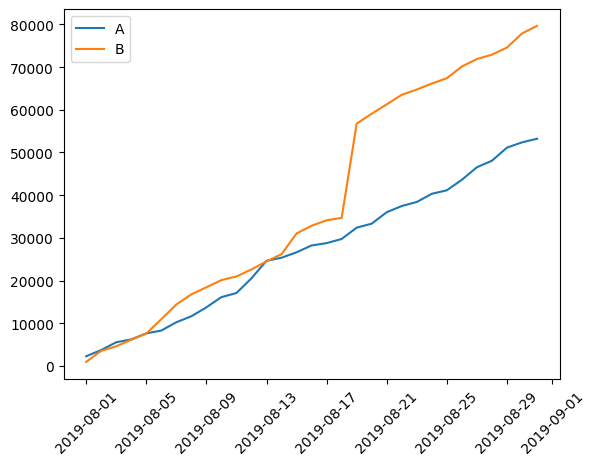

In [159]:
plt.plot(rentabilidad_acumulada_a['date'], rentabilidad_acumulada_a['accumulative_revenue'], label='A')
plt.plot(rentabilidad_acumulada_b['date'], rentabilidad_acumulada_b['accumulative_revenue'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Podemos observar que los ingresos del grupo B son mayores que los del grupo A por lo que podriamos suponer que el experimento está funcionando para incrementar los ingresos. Sin embargo debemos continuar analizando previo a llegar a conclusiones adelantadas, ya que debemos de probar si la diferencia realmente tiene valor estadístico.

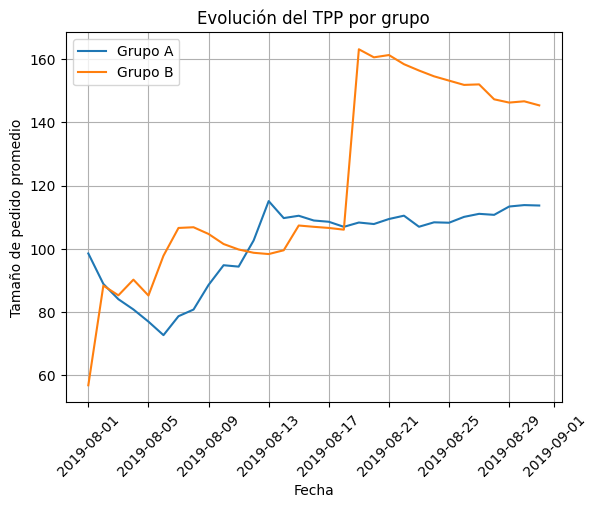

In [160]:
#Ahora creamos las variables de tamaño de pedido promedio acumulado por grupo y graficamos las mismas incluyendo las fechas.

# Creamos tablas para la fecha y el tamaño promedio de pedido acumulado....este lo tuve que consultar porque me atoré bastante.
ped_prom_a = datos_acumulados[datos_acumulados['group'] == 'A'][['date']].copy()
ped_prom_b = datos_acumulados[datos_acumulados['group'] == 'B'][['date']].copy()

# Calcular el tamaño de pedido promedio acumulado
ped_prom_a['tpp'] = datos_acumulados[datos_acumulados['group'] == 'A']['accumulative_revenue'] / datos_acumulados[datos_acumulados['group'] == 'A']['n_transaction']
ped_prom_b['tpp'] = datos_acumulados[datos_acumulados['group'] == 'B']['accumulative_revenue'] / datos_acumulados[datos_acumulados['group'] == 'B']['n_transaction']

# Graficar en función de las mini tablas que se crearon
plt.plot(ped_prom_a['date'], ped_prom_a['tpp'], label="Grupo A")
plt.plot(ped_prom_b['date'], ped_prom_b['tpp'], label="Grupo B")

plt.legend()
plt.xlabel("Fecha")
plt.ylabel("Tamaño de pedido promedio")
plt.title("Evolución del TPP por grupo")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

Nuevamente observamos que los promedios del grupo B son mayores que los del grupo A por lo que nos da mayores elementos para suponer que está funcionando el experimento. Sin embargo debemos continuar analizando previo a llegar a conclusiones adelantadas, e incluso podemos ver una tendencia que parecería que de continuar así implicaría que a lo largo del tiempo se reduce el efecto positivo de los cambios.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo, la visualización deja ver la diferencia claramente por cada grupo
</div>

In [161]:
# Creamos nuestra sobre la cual realizar los cálculos.
tpp_df = datos_acumulados.pivot(index="date", columns="group", values=["accumulative_revenue", "n_transaction"])

# Obtenemos el tamaño promedio de pedido acumulado para los grupos.
tpp_df["TPP_A"] = tpp_df["accumulative_revenue"]["A"] / tpp_df["n_transaction"]["A"]
tpp_df["TPP_B"] = tpp_df["accumulative_revenue"]["B"] / tpp_df["n_transaction"]["B"]

# Calculamos la direferencia relativa
tpp_df["Diferencia_Relativa"] = (tpp_df["TPP_B"] / tpp_df["TPP_A"]) - 1

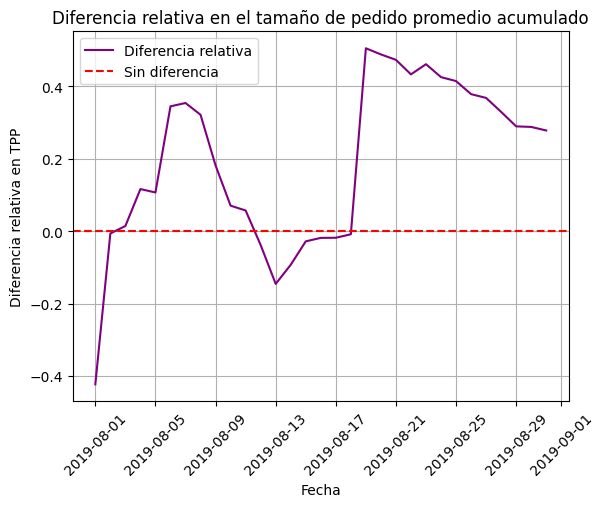

In [162]:
# Procedemos a realizar la gráfica

plt.plot(tpp_df.index, tpp_df["Diferencia_Relativa"], label="Diferencia relativa", color='purple')

plt.axhline(y=0, color='red', linestyle='--', label="Sin diferencia")
plt.legend()
plt.xlabel("Fecha")
plt.ylabel("Diferencia relativa en TPP")
plt.title("Diferencia relativa en el tamaño de pedido promedio acumulado")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

De manera general observamos que la tabla de diferencia relativa confirma nuestra sospechas que el experimento está funcionando sin embargo tiene una tendencia a la baja. Es bueno tener una idea más objetiva del comportamiento del experimento.

In [163]:
#Ahora procedemos a calcular la tasa de conversion diaria.
# Calculamos la tasa de conversión diaria para cada grupo

datos_acumulados["conversion_rate"] = datos_acumulados["n_transaction"] / datos_acumulados["accumulative_visits"]

# Hacemos un pivot por date y group para obtener tasas de conversión de cada grupo.
tabla_conversion = datos_acumulados.pivot(index="date", columns="group", values="conversion_rate")

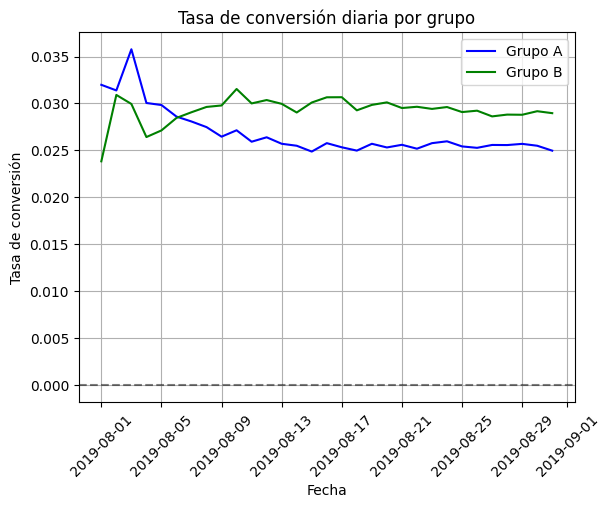

In [164]:
# Graficamos las tasas de conversión
plt.plot(tabla_conversion.index, tabla_conversion["A"], label="Grupo A", color='blue')
plt.plot(tabla_conversion.index, tabla_conversion["B"], label="Grupo B", color='green')

plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.legend()
plt.xlabel("Fecha")
plt.ylabel("Tasa de conversión")
plt.title("Tasa de conversión diaria por grupo")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

Podemos observar que el grupo B tuvo una mejor tasa de conversión que retuvo. Rebaso al grupo de control entre los dias del 6 al 9 de agosto por lo que es importante notar la fecha. Al parecer ambos grupos se encuentran estables.

In [165]:
#Hacemos un gráfico de dispersión del número de pedidos por usuario.

# Contar el número de pedidos por usuario
user_orders = datos_acumulados.groupby("n_client")["n_transaction"].sum().reset_index()

# Renombramos las columnas
user_orders.columns = ["n_client", "total_pedidos"]

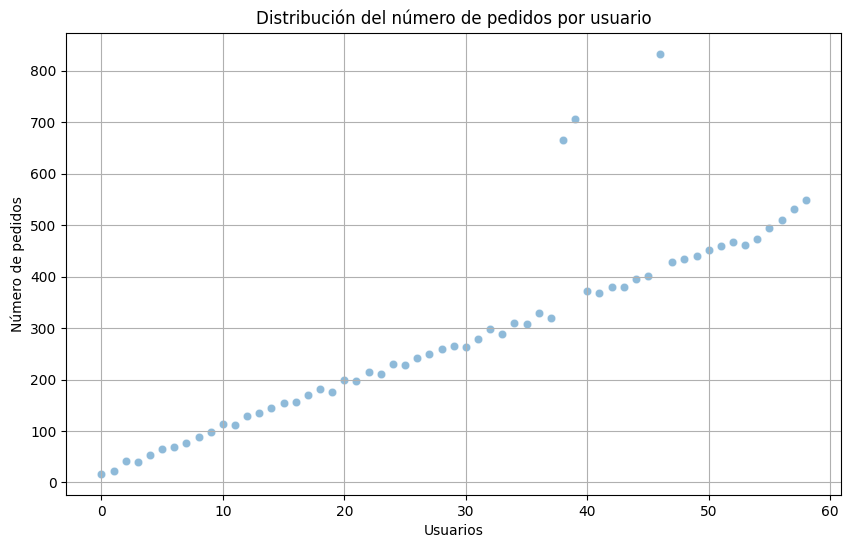

In [166]:
# Creamos nuestra gráfica.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=user_orders.index, y=user_orders["total_pedidos"], alpha=0.5)
plt.xlabel("Usuarios")
plt.ylabel("Número de pedidos")
plt.title("Distribución del número de pedidos por usuario")
plt.grid(True)

plt.show()

Podemos observar una tendencia de crecimiento con una par de casos extremos que son de observar o tomar en cuenta al momento de hacer más calculos.

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aquí en este ejercicio anterior me quedo duda de si estuvo bien la gráfica o si más bien era mostrar el comprotamiento a lo largo del tiempo es decir de alguna manera por dias, por que
por lo que infiero al momento de hacer el reset_index se colocan de menor a mayor por lo que obviamente la gráfica va a mostrar un crecimiento.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Así está muy bien Andrés, veo que hay un poco de confusión con el método reset_index, esto no cambia el orden de tus dato simplemente quita un de las columnas que está cómo index y la pone cómo otra columna. En este caso el index de tu dataframe era `n_client` pero al aplicar ese método lo que se hizo fue quitarlo cómo index y ponerlo cómo una columna con el mismo nombre
</div>

In [167]:
#Procedemos a calcular los percentiles 95 y 99 para los pedidos.

print(np.percentile(datos_acumulados['n_transaction'], [95,97,99]))

[493.9  513.57 537.63]


In [168]:
user_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   n_client       59 non-null     int64
 1   total_pedidos  59 non-null     int64
dtypes: int64(2)
memory usage: 1.0 KB


In [169]:
datos_acumulados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  62 non-null     datetime64[ns]
 1   group                 62 non-null     object        
 2   accumulative_visits   62 non-null     int64         
 3   n_transaction         62 non-null     int64         
 4   n_client              62 non-null     int64         
 5   accumulative_revenue  62 non-null     float64       
 6   conversion_rate       62 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 3.9+ KB


De acuerdo a los datos podemos fijar un umbral de 513 como el limite superior para ser considerado como anomalia para el tamaño de los pedidos.

In [170]:
#Hacemos un gráfico de dispersión de los precios de los pedidos.

# Calculamos el precio promedio de cada pedido
datos_acumulados["precio_por_pedido"] = datos_acumulados["accumulative_revenue"] / datos_acumulados["n_transaction"]

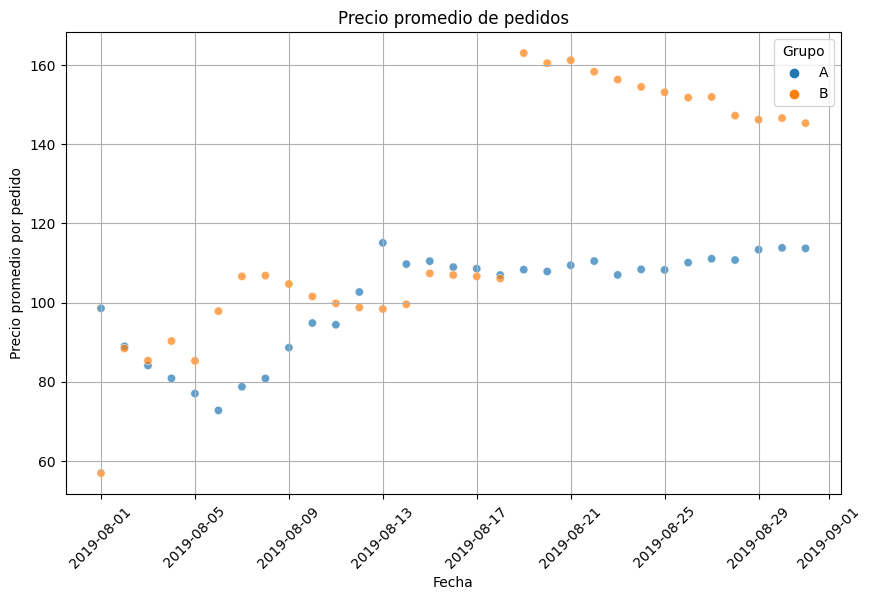

In [171]:
# Realizamos nuestra gráfica con la columna recien generada.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=datos_acumulados["date"], y=datos_acumulados["precio_por_pedido"], hue=datos_acumulados["group"], alpha=0.7)

# Configuración de la gráfica
plt.xlabel("Fecha")
plt.ylabel("Precio promedio por pedido")
plt.title("Precio promedio de pedidos")
plt.xticks(rotation=45)
plt.legend(title="Grupo")
plt.grid(True)

plt.show()

Nuevamente la gráfica refleja las tendencias que hemos observado para el ingreso con un cruce entre el grupo de control y el grupo de experimento y luego un importante rebase por el grupo de experimento con una normalización y tendencia lenta pero negativa hacia adelante en el tiempo.

In [172]:
#Procedemos a calcular los percentiles 95 y 99 para los precios de pedidos.

print(np.percentile(datos_acumulados['precio_por_pedido'], [95,97,99]))

[158.26361939 160.65023701 161.9602265 ]


Establecemos 160 como el límite superior para el precio de un pedido ya que apartir de mayor ingreso se puede considerar una anomalía.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo revisando los percentiles, encontrar valores anómalos puede ser crucial al momento de mostrar métricas correctas ya que estos pueden afectar los resultados finales
</div>

# Significancias estadísticas.

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Todo este bloque tuve que consultar muchísimo por la complejidad que conlleva X_x...
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Es parte del proceso Andrés, te felicito por tomarte el tiempo para investigarlo!
</div>

In [173]:
#Importamos la libreria nuevamente para evitar errores
import scipy.stats as stats

# Hacemos conversión de cada usuario por grupo
conversion_a = datos_acumulados[datos_acumulados['group'] == 'A']['n_transaction'] / datos_acumulados[datos_acumulados['group'] == 'A']['accumulative_visits']
conversion_b = datos_acumulados[datos_acumulados['group'] == 'B']['n_transaction'] / datos_acumulados[datos_acumulados['group'] == 'B']['accumulative_visits']

# Prueba de para la diferencia en conversión
print("Prueba de Mann-Whitney para conversión sin filtrar: p-valor = {:.3f}".format(stats.mannwhitneyu(conversion_a, conversion_b)[1]))


Prueba de Mann-Whitney para conversión sin filtrar: p-valor = 0.000


El valor nos hace suponer que sí hay diferencia real o estadística entre los grupos.

In [174]:
# Encontramos el tamaño promedio de pedido
tpp_a = datos_acumulados[datos_acumulados['group'] == 'A']['accumulative_revenue'] / datos_acumulados[datos_acumulados['group'] == 'A']['n_transaction']
tpp_b = datos_acumulados[datos_acumulados['group'] == 'B']['accumulative_revenue'] / datos_acumulados[datos_acumulados['group'] == 'B']['n_transaction']

# Prueba de Mann-Whitney para el tamaño promedio de pedido
print("Prueba de Mann-Whitney para TPP sin filtrar: p-valor = {:.3f}".format(stats.mannwhitneyu(tpp_a, tpp_b)[1]))

Prueba de Mann-Whitney para TPP sin filtrar: p-valor = 0.163


Como el valor es mayor a .05 nos lleva a concluir que no hay una diferencia estadísticamente significativa entre los grupos. 

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cuidado con el tipo de celdas que usamos, esta debería ser tipo markdown. Siempre hay que tener cuidado con esto para garantizar la ejecución de los proyectos
</div>

In [175]:
# Filtramos los usuarios anómalos
grupo_a_filtrado = datos_acumulados[
    (datos_acumulados['group'] == 'A') & 
    (~datos_acumulados['n_transaction'].isin(usuarios_muchos_pedidos['n_transaction'])) & 
    (~datos_acumulados['precio_por_pedido'].isin(usuarios_pedidos_caros['precio_por_pedido']))
]

grupo_b_filtrado = datos_acumulados[
    (datos_acumulados['group'] == 'B') & 
    (~datos_acumulados['n_transaction'].isin(usuarios_muchos_pedidos['n_transaction'])) & 
    (~datos_acumulados['precio_por_pedido'].isin(usuarios_pedidos_caros['precio_por_pedido']))
]

# Verificar los tamaños después del filtrado
print(f"Tamaño original Grupo A: {datos_acumulados[datos_acumulados['group'] == 'A'].shape[0]}, después del filtrado: {grupo_a_filtrado.shape[0]}")
print(f"Tamaño original Grupo B: {datos_acumulados[datos_acumulados['group'] == 'B'].shape[0]}, después del filtrado: {grupo_b_filtrado.shape[0]}")


Tamaño original Grupo A: 31, después del filtrado: 31
Tamaño original Grupo B: 31, después del filtrado: 27



<div class="alert alert-block alert-info">
<b>En esta parte tuve que retornar a revisar desde cómo se fijaron mis umbrales para anómalos, primero identifique que un umbral estaba mal, muy alto por lo que se procedio a calcular con el Df correcto. Por otro lado despues de mucho consultar e iterar con los ejercicios llegue a este método de filtrado. La clave me parece ser fue en el uso del operador de negación ~. Al parecer no lo estaba aplicando por lo que en lugar de filtrar los anómalos se estaban filtrando los normales jeje XD. Con apoyo de fuentes incluí la parte para asegurarse que después del filtrado habia suficientes datos para correr las pruebas mann-whitney. </b> <a class=“tocSkip”></a>
</div>

In [176]:
# Prueba para la diferencia en conversión para datos filtrados:
p_valor_conversion = stats.mannwhitneyu(
    grupo_a_filtrado['n_transaction'],
    grupo_b_filtrado['n_transaction'],
    alternative="two-sided"
)[1]

# Prueba para el tamaño promedio de pedido con datos filtrados:
p_valor_tpp = stats.mannwhitneyu(
    grupo_a_filtrado['precio_por_pedido'],
    grupo_b_filtrado['precio_por_pedido'],
    alternative="two-sided"
)[1]

print(f"Prueba de Mann-Whitney para conversión filtrado: p-valor = {p_valor_conversion:.5f}")
print(f"Prueba de Mann-Whitney para TPP filtrado: p-valor = {p_valor_tpp:.5f}")


Prueba de Mann-Whitney para conversión filtrado: p-valor = 0.76709
Prueba de Mann-Whitney para TPP filtrado: p-valor = 0.56409


# CONCLUSIONES

De acuerdo a las gráficas y resultados la sugerencia es que el experimente ha sido un exito hasta ahora con el grupo B mostrando diferencias estadísticamente representativas en algunas de las métricas. Sin embargo de existir los recursos para continuar con experimento se puede dejar correr para observar su comportamiento a largo plazo, toda vez que existe una tendencia hacia la baja y habria que analizar su comportamiento en periodos más largos.

<div class="alert alert-block alert-danger">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen avance de tu proyecto Andrés, te he dejado algunos comentarios donde hay oportunidad de mejora pero en sí las correcciones son muy pocas para completar tu proyecto.
    
Sobre las conclusiones te pediría ser un poco más detallado, esta parte es donde se debe hacer referencia a los hallazgos importantes de tu notebook y tienes varias gráficas y cálculos a lo largo del notebook de los cuales debes obtener hallazgos y mencionarlos acá cómo un resúmen. Debes dejar claro cómo tu análisis aporta valor a la empresa
</div>

#Nueva conclusión:
Con los datos que hemos obtenido podemos sugerir terminar el experimento ya que con los resultados podemos concluir que si bien lo que parecía un resultado positivo del experimento, ya una vez analizando los datos nos indica que en realidad no hay una diferencia estadìsticamente representativa. Si bien nuestras gráficas iniciales parecian indicar un resultado deseado, al momento de filtrar valores atìpicos, o clientes excepcionales, hemos descubierto que el experimento no està teniendo los resultados requeridos como para sugerir su implementación post-alpha. Los datos no nos indican un impacto significativo en la conversiòn ni en el tamaño de pedido.
Podemos sugerir el probar alguna de las otras hipòtesis para mejores resultados o incluso revisar nuestras suposiciones al momento de construir nuestra hipótesis prioritaria.
Por ultimo, y de acuerdo a las gráficas que generamos podemos proyectar que de continuar el experimento, si los recursos lo permiten, se comprobará que con el paso del tiempo no hay diferencias entre el grupo de control el de experimento, tal y como comienzan a mostrar las graficas que hemos generado.


<div class="alert alert-block alert-success">
<b>Comentario general (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con los ajustes Andrés! Ahora es muhco más detallado y completo tu proyecto. Siempre procura revisar los valores atípicos en tus datos ya que estos pueden alterar los resultados de tus análisis. Saludos!
</div>